<h1 style="color:blue; font-size:40px; text-align:center;">
EN 3160 Assignment 1 on Intensity Transformations and Neighborhood Filtering
</h1>

<h3 style="color:gray; font-size:24px; text-align:center;">
Index: 220276V    Name: Jayathissa M.P.N.V.
</h3>

In [7]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

## Question 1 :

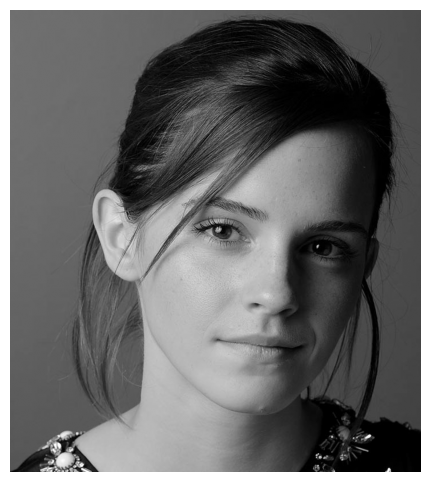

In [3]:
# Import Emma Image 
emma = cv.imread('a1images/emma.jpg', cv.IMREAD_GRAYSCALE)
# Display the imported image
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(emma, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

51
100
105
(256,)


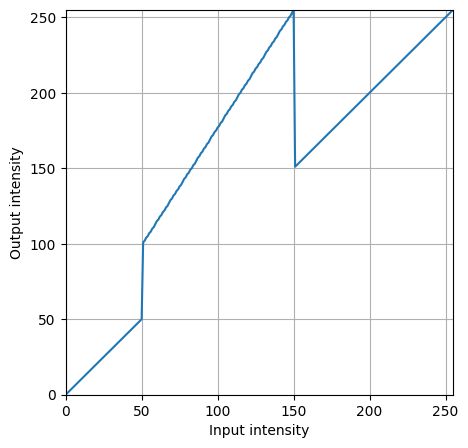

In [4]:
# Design the transformation Filter

# Control points
c = np.array([(50, 100), (150, 255)])

#Create evenly spaced values for time stamps needed
t1 = np.linspace(0, c[0,0], c[0,0] + 1 - 0).astype('uint8')
print(len(t1))
t2 = np.linspace(c[0,1] + 1, c[1,1], c[1,0] - c[0,0]).astype('uint8')
print(len(t2))
t3 = np.linspace(c[1,0] + 1, c[1,1], c[1,1] - c[1,0]).astype('uint8')
print(len(t3))

# Concatenate all segments to create the transformation array
t = np.concatenate((t1, t2, t3), axis=0).astype('uint8')
print(t.shape)

# Plot the array
plt.figure(figsize=(5, 5))
plt.plot(t)
plt.xlabel("Input intensity")
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.ylabel("Output intensity")
plt.grid(True)
plt.show()


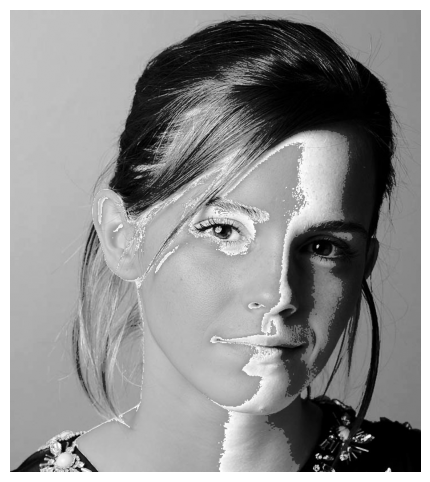

In [5]:
# Transform the image
emma_transformed = t[emma]

#Display transformed image
plt.figure(figsize=(6, 6))
plt.imshow(emma_transformed, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

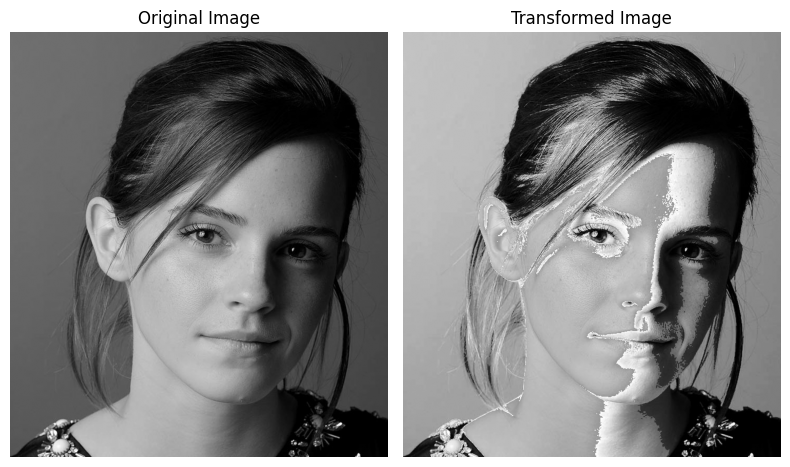

In [6]:
# Display the transformed image

fig, ax = plt.subplots(1, 2, figsize=(8, 6))
ax[0].imshow(emma, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis("off")
ax[1].imshow(emma_transformed, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Transformed Image')
ax[1].axis("off")

plt.tight_layout()
plt.show()


## Question 2 :

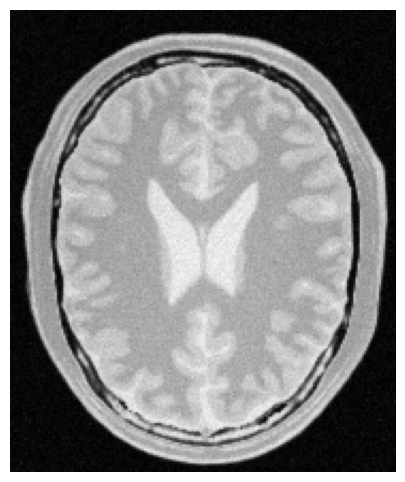

In [7]:
# import the image
brain = cv.imread('a1images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)

# Display the imported image
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(brain, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

#### White Matter

(256,)


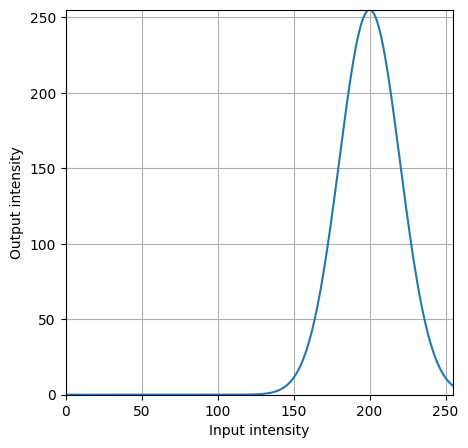

In [8]:
# define the gaussian pulse

mu = 200
sigma = 20
x = np.linspace(0, 255, 256)
t = 255 * np.exp(-((x - mu)**2) / (2 * sigma**2))

# Ensure the output is in the valid range for image intensities [0, 255]
t = np.clip(t, 0, 255)

print(t.shape)

# Plot the array
plt.figure(figsize=(5, 5))
plt.plot(t)
plt.xlabel("Input intensity")
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.ylabel("Output intensity")
plt.grid(True)
plt.show()

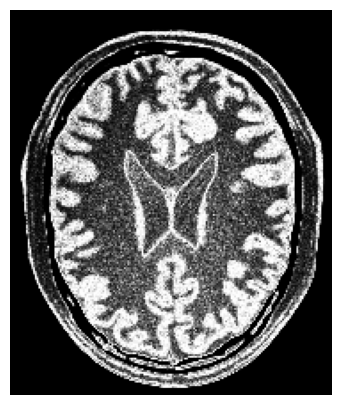

In [9]:
# Transformation of the picture

white = t[brain]

# Display the image
plt.figure(figsize=(5, 5))
plt.imshow(white, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

#### Gray Matter


(256,)


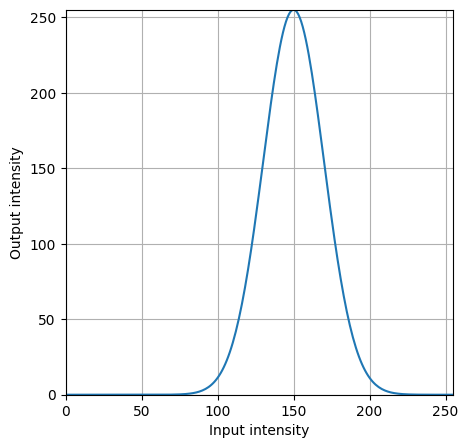

In [10]:
# define the gaussian pulse
mu = 150
sigma = 20
x = np.linspace(0, 255, 256)
t = 255 * np.exp(-((x - mu)**2) / (2 * sigma**2))

# Ensure the output is in the valid range for image intensities [0, 255]
t = np.clip(t, 0, 255)

print(t.shape)

# Plot the array
plt.figure(figsize=(5, 5))
plt.plot(t)
plt.xlabel("Input intensity")
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.ylabel("Output intensity")
plt.grid(True)
plt.show()

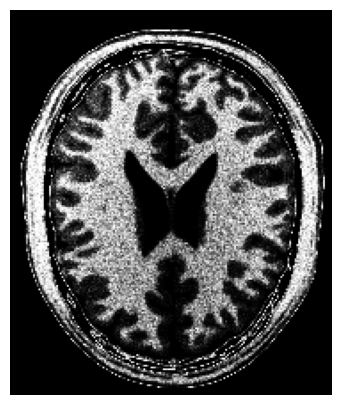

In [11]:
# Transformation of the picture

gray = t[brain]

# Display the image
plt.figure(figsize=(5, 5))
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

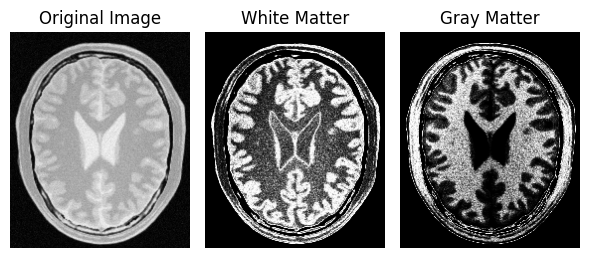

In [12]:
# Plot three images 

fig, ax = plt.subplots(1, 3, figsize=(6, 6))
ax[0].imshow(brain, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis("off")
ax[1].imshow(white, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('White Matter')
ax[1].axis("off")
ax[2].imshow(gray, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Gray Matter')
ax[2].axis("off")


plt.tight_layout()
plt.show()

## Question 3: 

(np.float64(-0.5), np.float64(719.5), np.float64(479.5), np.float64(-0.5))

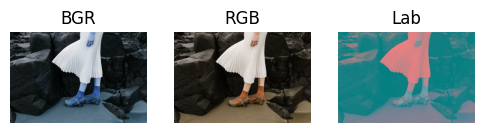

In [19]:
# Import image
imq3_bgr = cv.imread('a1images/highlights_and_shadows.jpg')

imq3_lab = cv.cvtColor(imq3_bgr, cv.COLOR_BGR2LAB)
imq3_rgb = cv.cvtColor(imq3_bgr, cv.COLOR_BGR2RGB)

# Display the imported image

fig, ax = plt.subplots(1, 3, figsize=(6, 6))
ax[0].imshow(imq3_bgr, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('BGR')
ax[0].axis("off")
ax[1].imshow(imq3_rgb, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('RGB')
ax[1].axis("off")
ax[2].imshow(imq3_lab, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Lab')
ax[2].axis("off")


#### Apply Gamma Correction

In [14]:
# Split the image in to L*a*b* color space
L,a,b = cv.split(imq3_lab)

# Define and apply gamma transformation
gamma = 0.5
t = np.array([(i/255.0)**(gamma)*255 for i in np.arange(0, 256)]).astype('uint8')
L_modified = cv.LUT(L, t)

# Merge the channels
merged = cv.merge([L_modified, a, b])
imq3_modified = cv.cvtColor(merged, cv.COLOR_LAB2RGB)


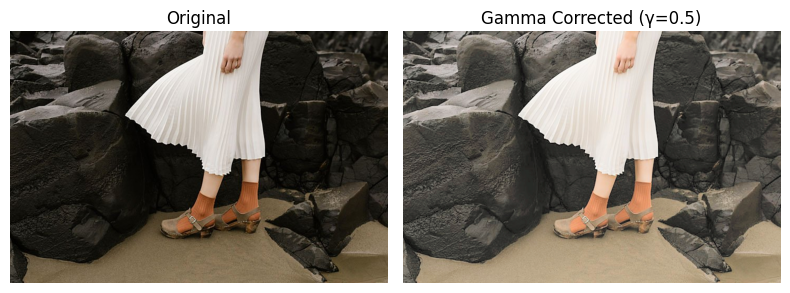

In [15]:
# Create a figure and axes
fig, axs = plt.subplots(1, 2, figsize=(8, 6))

# Plot the first image
axs[0].imshow(imq3_rgb)
axs[0].set_title('Original')
axs[0].axis('off')  # Turn off the axis

# Plot the second image
axs[1].imshow(imq3_modified)
axs[1].set_title(f'Gamma Corrected (γ={gamma})')
axs[1].axis('off')  # Turn off the axis

# Show the plot
plt.tight_layout()
plt.show()

#### Histogram Computation

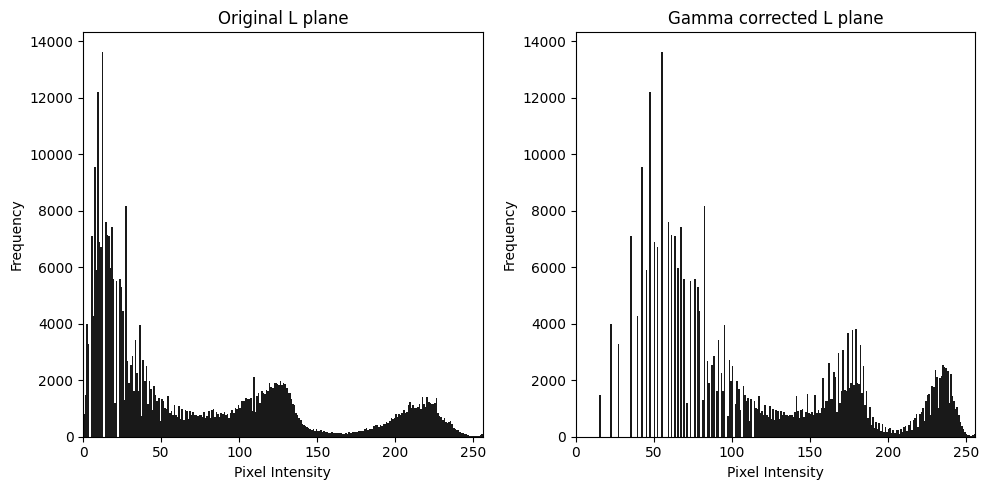

In [16]:
# Compute the histograms for both images
hist1 = cv.calcHist([L], [0], None, [256], [0, 256])
hist2 = cv.calcHist([L_modified], [0], None, [256], [0, 256])

L_flat = L.flatten()
L_modified_flat = L_modified.flatten()

# Create a figure with two subplots
plt.figure(figsize=(10, 5))

# First subplot: Histogram of the first image
plt.subplot(1, 2, 1)
plt.hist(L_flat, bins=256, range=(0, 256), color='black', alpha=0.9)
plt.title('Original L plane')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])

# Second subplot: Histogram of the second image
plt.subplot(1, 2, 2)
plt.hist(L_modified_flat, bins=256, range=(0, 256), color='black', alpha=0.9)
plt.title('Gamma corrected L plane')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])

# Display the plots side by side
plt.tight_layout()  # Adjusts the spacing between subplots for a neat layout
plt.show()

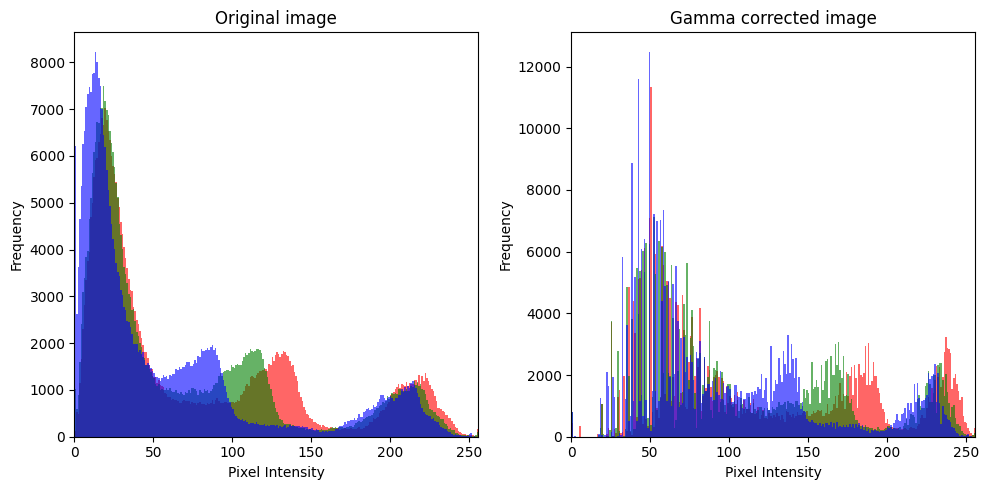

In [17]:
# Color channels
colors = ('r', 'g', 'b')  # Color channels
plt.figure(figsize=(10, 5))

# First image's histograms
plt.subplot(1, 2, 1)
for i, col in enumerate(colors):
    # Flatten the channel
    channel_flat = imq3_rgb[:, :, i].flatten()  # Extract and flatten the red, green, or blue channel
    plt.hist(channel_flat, bins=256, range=(0, 256), color=col, alpha=0.6)  # Use plt.hist
plt.title('Original image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])

# Second image's histograms
plt.subplot(1, 2, 2)
for i, col in enumerate(colors):
    # Flatten the channel
    channel_flat = imq3_modified[:, :, i].flatten()  # Extract and flatten the channel
    plt.hist(channel_flat, bins=256, range=(0, 256), color=col, alpha=0.6)  # Use plt.hist
plt.title('Gamma corrected image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])

# Display the plots side by side
plt.tight_layout()  # Adjusts the spacing between subplots for a neat layout
plt.show()

## Question 4:

In [4]:
#import spider image
spider = cv.imread('a1images/spider.png')
# Convert colour of the image
spider_hsv = cv.cvtColor(spider, cv.COLOR_BGR2HSV)
spider_rgb = cv.cvtColor(spider, cv.COLOR_BGR2RGB)




In [5]:
# Split into planes
H, S, V = cv.split(spider_hsv)

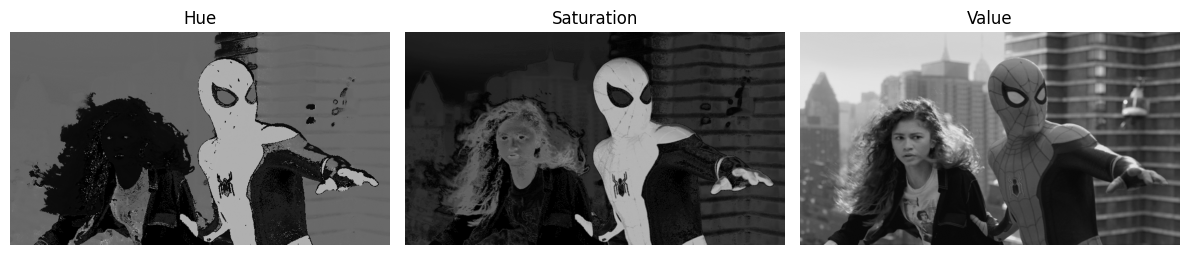

In [6]:
# Create the figure for plotting
fig, ax = plt.subplots(1, 3, figsize=(12, 8))

ax[0].imshow(H, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Hue')
ax[0].axis("off")
ax[1].imshow(S, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Saturation')
ax[1].axis("off")
ax[2].imshow(V, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Value')
ax[2].axis("off")

plt.tight_layout()
plt.show()

In [7]:
# Define the transformation function
a = 0.6
sigma = 70.0 
x = np.arange(0, 256)
f = np.minimum(x + a * 128 * np.exp(-((x - 128)**2) / (2 * sigma**2)), 255).astype('uint8')


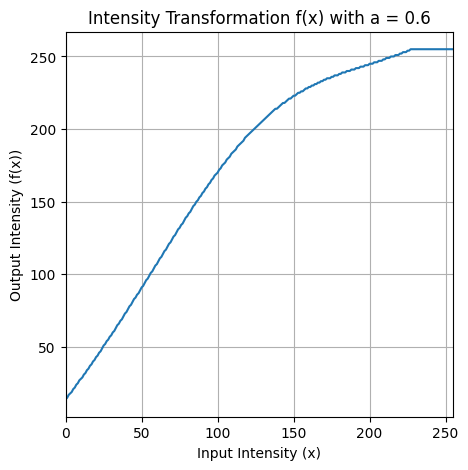

In [8]:
# Display the image
plt.figure(figsize=(5, 5))
plt.plot(x, f)
plt.title(f'Intensity Transformation f(x) with a = {a}')
plt.xlabel('Input Intensity (x)')
plt.ylabel('Output Intensity (f(x))')
plt.grid(True)
plt.xlim([0, 255])
plt.xlim([0, 255])
plt.show()


In [9]:
# Apply transformation to Saturation plane
S_modified = cv.LUT(S, f)

# Merge
merged = cv.merge([H, S_modified, V])
spider_modified = cv.cvtColor(merged, cv.COLOR_HSV2RGB)

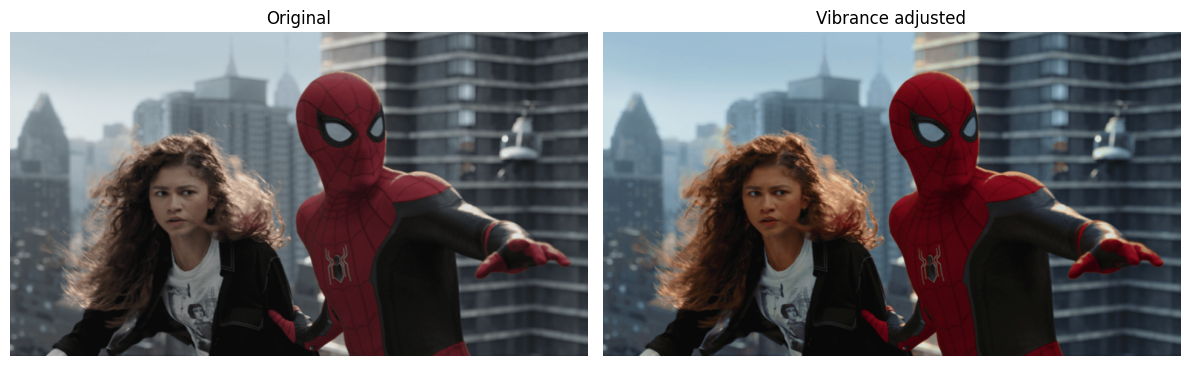

In [10]:
# Create a figure and axes
fig, axs = plt.subplots(1, 2, figsize=(12, 8))

# Plot the first image
axs[0].imshow(spider_rgb)
axs[0].set_title('Original')
axs[0].axis('off')  # Turn off the axis

# Plot the second image
axs[1].imshow(spider_modified)
axs[1].set_title('Vibrance adjusted')
axs[1].axis('off')  # Turn off the axis

# Show the plot
plt.tight_layout()
plt.show()

## Question 5 :

In [11]:
# Import Shells image
shells = cv.imread('a1images/shells.tif', cv.IMREAD_GRAYSCALE)

In [12]:
def histogram_equalization(img):
    # Step 1: Flatten the image
    flat = img.flatten()
    
    # Step 2: Compute histogram
    hist = np.bincount(flat, minlength=256)
    
    # Step 3: Normalize histogram (PDF)
    pdf = hist / float(np.sum(hist))
    
    # Step 4: Compute CDF
    cdf = np.cumsum(pdf)
    
    # Step 5: Normalize CDF to [0, 255]
    cdf_normalized = np.round(cdf * 255).astype(np.uint8)
    
    # Step 6: Map old values to new
    equalized_flat = cdf_normalized[flat]
    
    # Step 7: Reshape to original
    equalized_img = equalized_flat.reshape(img.shape)
    
    return equalized_img, hist, np.bincount(equalized_img.flatten(), minlength=256)


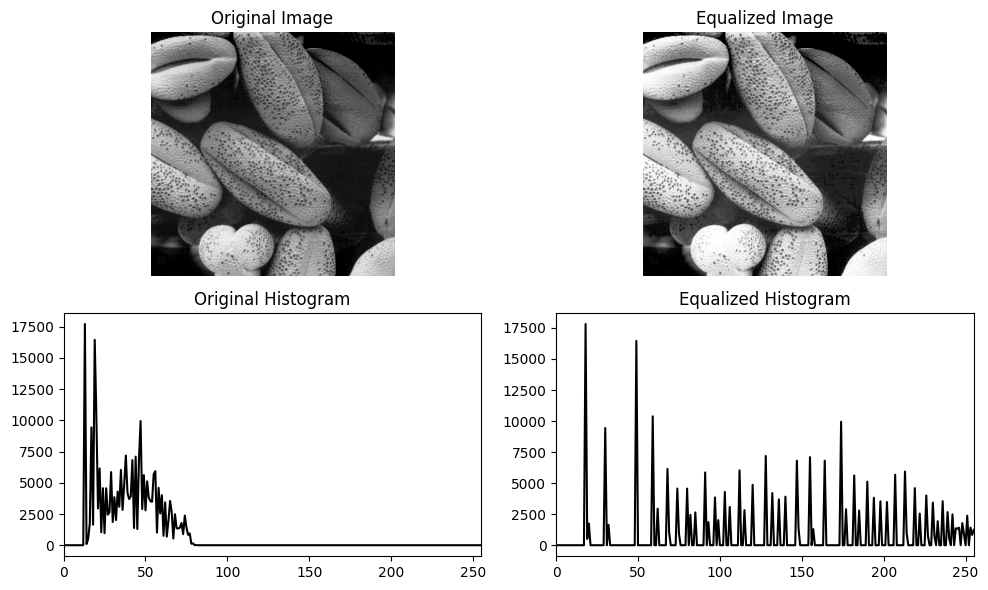

In [13]:
equalized_img, orig_hist, equalized_hist = histogram_equalization(shells)


fig, axs = plt.subplots(2, 2, figsize=(10, 6))

axs[0][0].imshow(shells, cmap='gray')
axs[0][0].set_title('Original Image')
axs[0][0].axis('off')

axs[0][1].imshow(equalized_img, cmap='gray')
axs[0][1].set_title('Equalized Image')
axs[0][1].axis('off')

axs[1][0].plot(orig_hist, color='black')
axs[1][0].set_title('Original Histogram')
axs[1][0].set_xlim([0, 255])

axs[1][1].plot(equalized_hist, color='black')
axs[1][1].set_title('Equalized Histogram')
axs[1][1].set_xlim([0, 255])

plt.tight_layout()
plt.show()

## Question 6 :

In [17]:
# Import Jennifer image
jennifer = cv.imread('a1images/jeniffer.jpg')
jennifer_hsv = cv.cvtColor(jennifer, cv.COLOR_BGR2HSV)
jennifer_rgb = cv.cvtColor(jennifer, cv.COLOR_BGR2RGB)

# Split into planes
H, S, V = cv.split(jennifer_hsv)

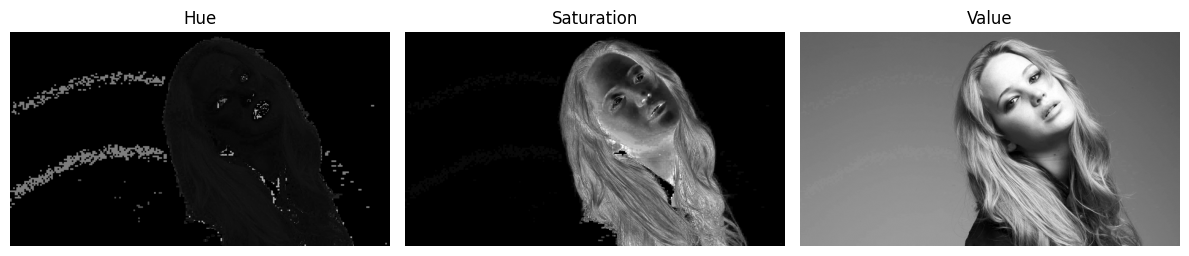

In [18]:
# Create the figure for plotting
fig, ax = plt.subplots(1, 3, figsize=(12, 8))

ax[0].imshow(H, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Hue')
ax[0].axis("off")
ax[1].imshow(S, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Saturation')
ax[1].axis("off")
ax[2].imshow(V, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Value')
ax[2].axis("off")

plt.tight_layout()
plt.show()

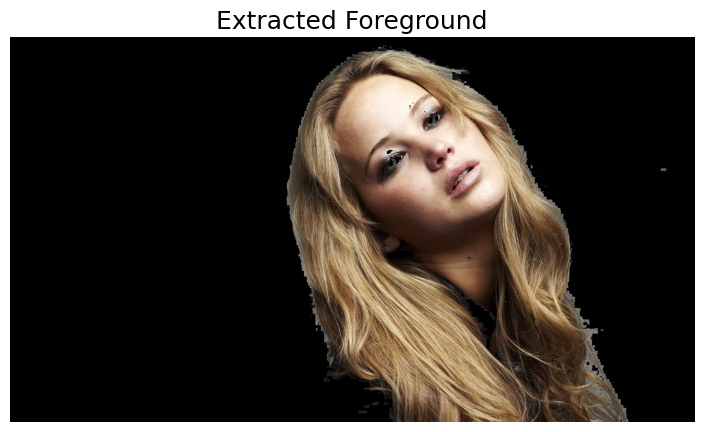

In [19]:
# Apply thresholding on Saturation plane
_, mask = cv.threshold(S, 12, 255, cv.THRESH_BINARY)

# Use bitwise_and to extract the foreground using the mask
foreground = cv.bitwise_and(jennifer, jennifer, mask=mask)

# Display the extracted foreground
plt.figure(figsize=(10, 5))

plt.imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB))
plt.title('Extracted Foreground', fontsize=18)
plt.axis('off')
plt.show()

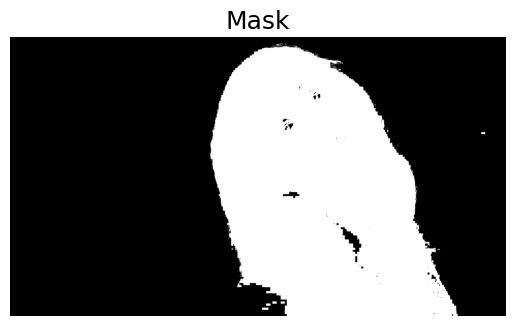

In [20]:
plt.imshow(mask, cmap='gray')
plt.title('Mask', fontsize=18)
plt.axis('off')
plt.show()

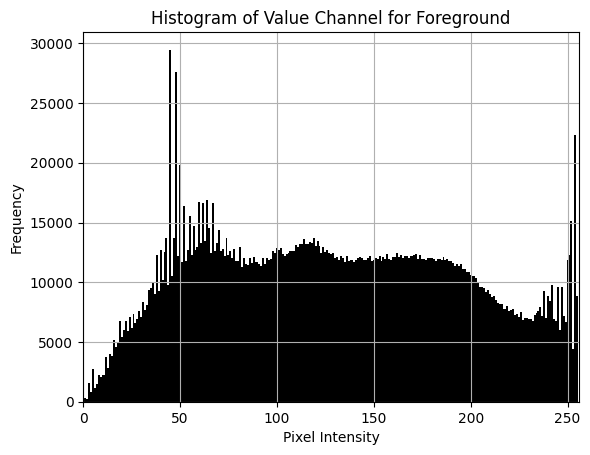

In [21]:
# Compute and plot the histogram of the Value (V) channel of the foreground
foreground_hsv = cv.cvtColor(foreground, cv.COLOR_BGR2HSV)
H_fg, S_fg, V_fg = cv.split(foreground_hsv)

# Calculate the histogram of the Value channel
hist = cv.calcHist([V_fg], [0], mask, [256], [0, 256])

# Create an array for the x positions of the bars
x_positions = np.arange(len(hist))

# Plot the histogram as a bar plot
plt.figure()
plt.bar(x_positions, hist.flatten(), color='black', width=1)  # Use width=1 for each bar
plt.title('Histogram of Value Channel for Foreground')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])  # Set x-axis limits
plt.grid(True)
plt.show()

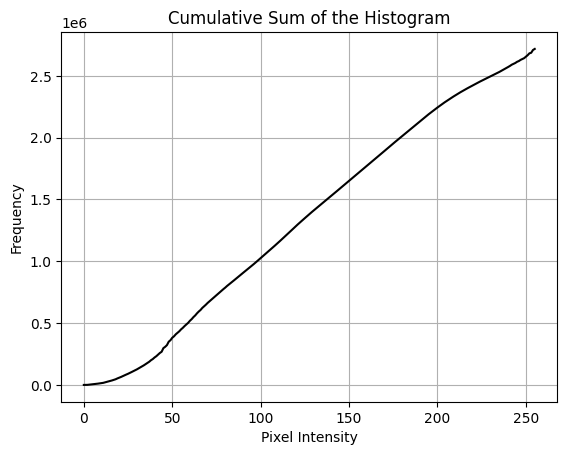

In [22]:
cdf = hist.cumsum()

# Plot the histogram
plt.figure()
plt.plot(cdf, color='black')
plt.title('Cumulative Sum of the Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

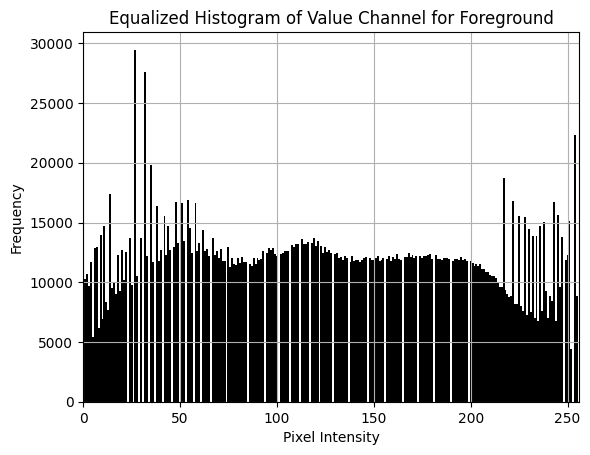

In [23]:
# Number of pixels
pixels = cdf[-1]

# Define transformation
t = np.array([(256-1)/(pixels)*cdf[k] for k in range(256)]).astype("uint8")

# Equalize
V_eq = t[V_fg]

# Calculate the histogram of the equalized Value channel
hist = cv.calcHist([V_eq], [0], mask, [256], [0, 256])

# Create an array for the x positions of the bars
x_positions = np.arange(len(hist))

# Plot the histogram as a bar plot
plt.figure()
plt.bar(x_positions, hist.flatten(), color='black', width=1)  # Use width=1 for each bar
plt.title('Equalized Histogram of Value Channel for Foreground')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])  # Set x-axis limits
plt.grid(True)
plt.show()


In [24]:
# Merge
merged = cv.merge([H_fg, S_fg, V_eq])
foreground_modified = cv.cvtColor(merged, cv.COLOR_HSV2RGB)

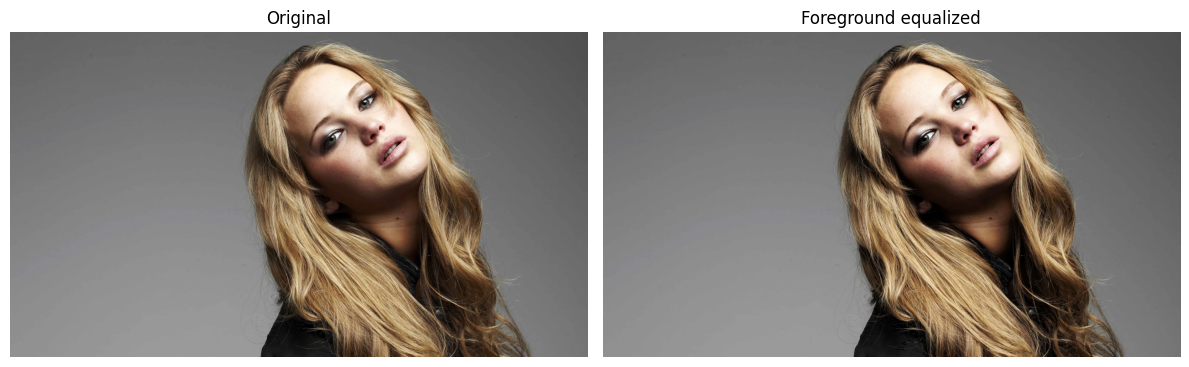

In [25]:
# Extract the background
background = cv.bitwise_and(jennifer, jennifer, mask=cv.bitwise_not(mask))

# Merge the equalized foreground and background
result = cv.add(cv.cvtColor(background, cv.COLOR_BGR2RGB), foreground_modified)

# Create a figure and axes
fig, axs = plt.subplots(1, 2, figsize=(12, 8))

# Plot the first image
axs[0].imshow(jennifer_rgb)
axs[0].set_title('Original')
axs[0].axis('off')  # Turn off the axis

# Plot the second image
axs[1].imshow(result)
axs[1].set_title('Foreground equalized')
axs[1].axis('off')  # Turn off the axis

# Show the plot
plt.tight_layout()
plt.show()



## Question 7 :

In [30]:
# Import Einstein image
einstein = cv.imread('a1images/einstein.png', cv.IMREAD_GRAYSCALE)

In [31]:
# Define the Sobel-X filter
sobel_x = np.array([[1, 0, -1], 
                    [2, 0, -2], 
                    [1, 0, -1]])

# Define the Sobel-Y filter
sobel_y = np.array([[1, 2, 1], 
                    [0, 0, 0], 
                    [-1, -2, -1]])

print("Sobel X filter:")
print(sobel_x)

print("\nSobel Y filter:")
print(sobel_y)

Sobel X filter:
[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]

Sobel Y filter:
[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


In [32]:
# Apply the Sobel filter in the X direction
sobel_x_filtered = cv.filter2D(einstein, cv.CV_64F, sobel_x)

# Apply the Sobel filter in the Y direction
sobel_y_filtered = cv.filter2D(einstein, cv.CV_64F, sobel_y)

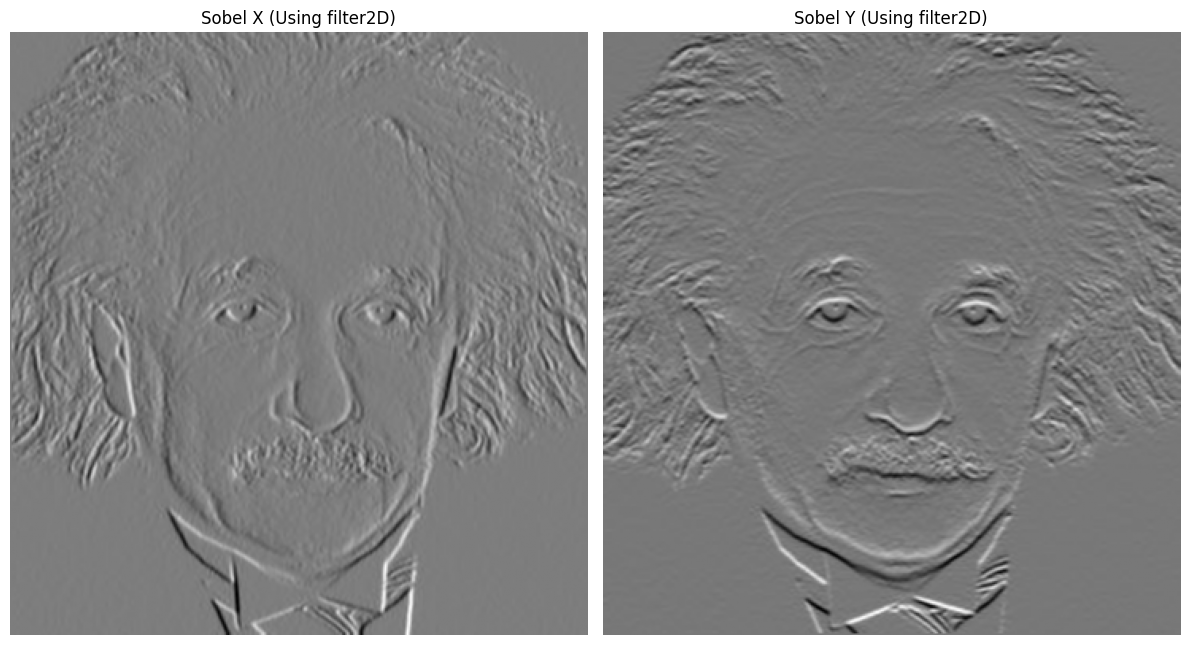

In [33]:
# Create the figure for plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 8))

ax[0].imshow(sobel_x_filtered, cmap='gray')
ax[0].set_title('Sobel X (Using filter2D)')
ax[0].axis("off")
ax[1].imshow(sobel_y_filtered, cmap='gray')
ax[1].set_title('Sobel Y (Using filter2D)')
ax[1].axis("off")

plt.tight_layout()
plt.show()

In [37]:
def sobel_filter_custom(image, direction='x'):
    """
    Apply Sobel filter to an image in the specified direction ('x' or 'y').
    """
    rows, cols = image.shape
    output = np.zeros((rows, cols))
    
    # Define Sobel kernels
    sobel_x = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])
    
    sobel_y = np.array([[-1, -2, -1],
                        [ 0,  0,  0],
                        [ 1,  2,  1]])
    
    # Pick the right kernel
    if direction == 'x':
        kernel = sobel_x
    else:
        kernel = sobel_y
    
    # Convolution process
    for i in range(rows - 2):
        for j in range(cols - 2):
            region = image[i:i+3, j:j+3]
            conv_value = np.sum(region * kernel)
            output[i+1, j+1] = conv_value
    
    return output


In [39]:
sobel_x_filtered = sobel_filter_custom(einstein, direction='x')
sobel_y_filtered = sobel_filter_custom(einstein, direction='y')
edges = np.sqrt(sobel_x_filtered**2 + sobel_y_filtered**2)

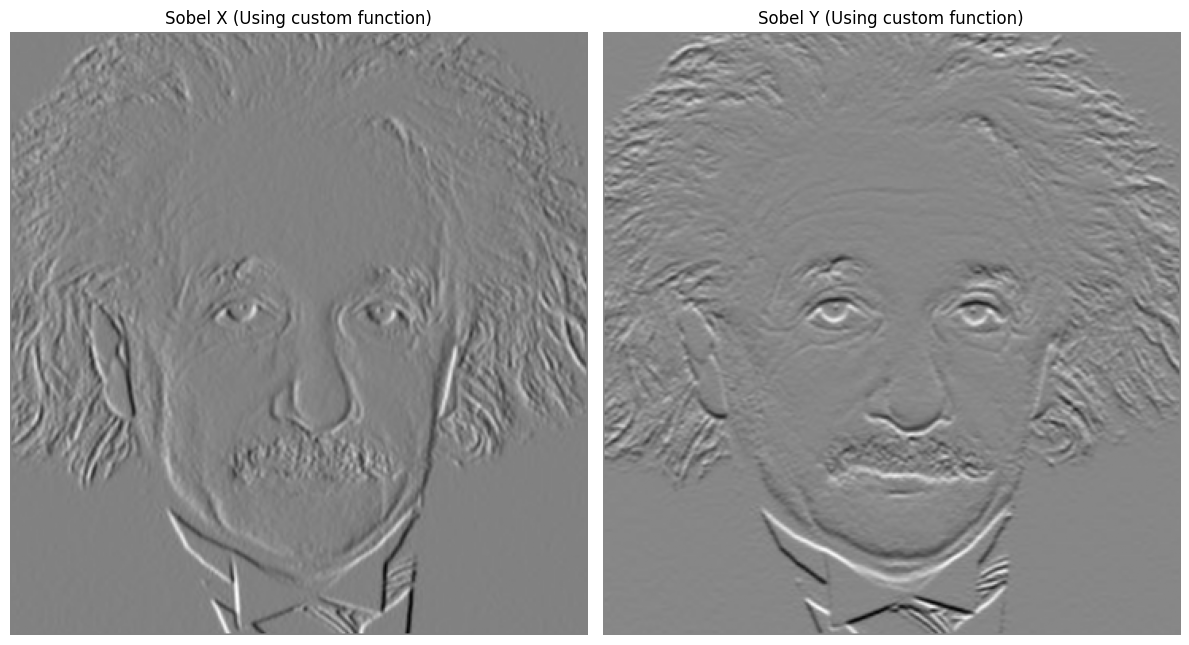

In [40]:

# Create the figure for plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 8))

ax[0].imshow(sobel_x_filtered, cmap='gray')
ax[0].set_title('Sobel X (Using custom function)')
ax[0].axis("off")
ax[1].imshow(sobel_y_filtered, cmap='gray')
ax[1].set_title('Sobel Y (Using custom function)')
ax[1].axis("off")

plt.tight_layout()
plt.show()

In [41]:
# Sobel x filter seperated
sobel_x_vertical = np.array([[1], [2], [1]])
sobel_x_horizontal = np.array([[1, 0, -1]])

# Sobel y filter seperated
sobel_y_vertical = np.array([[1], [0], [-1]])
sobel_y_horizontal = np.array([[1, 2, 1]])

# Apply the vertical and horizontal filters consecutively
x_mid = cv.filter2D(einstein, cv.CV_64F, sobel_x_horizontal)
x_filtered_image = cv.filter2D(x_mid, cv.CV_64F, sobel_x_vertical)

y_mid = cv.filter2D(einstein, cv.CV_64F, sobel_y_vertical)
y_filtered_image = cv.filter2D(y_mid, cv.CV_64F, sobel_y_horizontal)

print(sobel_x_vertical @ sobel_x_horizontal)
print(sobel_y_vertical @ sobel_y_horizontal)

[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]
[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


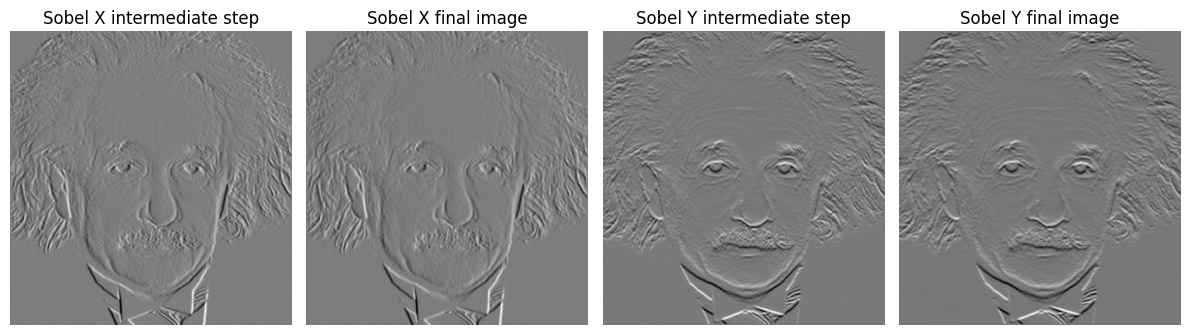

In [42]:
# Create the figure for plotting
fig, ax = plt.subplots(1, 4, figsize=(12, 8))

ax[0].imshow(x_mid, cmap='gray')
ax[0].set_title('Sobel X intermediate step')
ax[0].axis("off")
ax[1].imshow(x_filtered_image, cmap='gray')
ax[1].set_title('Sobel X final image')
ax[1].axis("off")
ax[2].imshow(y_mid, cmap='gray')
ax[2].set_title('Sobel Y intermediate step')
ax[2].axis("off")
ax[3].imshow(y_filtered_image, cmap='gray')
ax[3].set_title('Sobel Y final image')
ax[3].axis("off")

plt.tight_layout()
plt.show()

## Question 8 :

In [27]:
def zoom(img, technique, scale=4):
    """
    Manually zooms an image using nearest neighbor or bilinear interpolation.

    Parameters:
        img (np.ndarray): Input image.
        technique (str): 'nn' or 'bilinear'
        scale (float): Zoom factor (0 < scale <= 10)
    """
    h, w, c = img.shape
    new_h, new_w = int(h * scale), int(w * scale)
    zoomed = np.zeros((new_h, new_w, c), dtype=img.dtype)

    for y in range(new_h):
        for x in range(new_w):
            # Map back to original coordinates
            src_x = x / scale
            src_y = y / scale

            if technique == 'nn':
                # Nearest neighbor
                nearest_x = int(round(src_x))
                nearest_y = int(round(src_y))
                nearest_x = min(nearest_x, w - 1)
                nearest_y = min(nearest_y, h - 1)
                zoomed[y, x] = img[nearest_y, nearest_x]

            elif technique == 'bilinear':
                # Bilinear interpolation
                x0 = int(np.floor(src_x))
                x1 = min(x0 + 1, w - 1)
                y0 = int(np.floor(src_y))
                y1 = min(y0 + 1, h - 1)

                dx = src_x - x0
                dy = src_y - y0

                top = (1 - dx) * img[y0, x0] + dx * img[y0, x1]
                bottom = (1 - dx) * img[y1, x0] + dx * img[y1, x1]
                zoomed[y, x] = (1 - dy) * top + dy * bottom

            else:
                raise ValueError("Technique must be 'nn' or 'bilinear'")
    return zoomed



In [28]:
def norm_SSD(img1, img2):
    """
    Compute normalized sum of squared differences.
    """
    if img1.shape != img2.shape:
        raise ValueError("Images must have the same dimensions")
    return np.sum((img1.astype(np.float32) - img2.astype(np.float32)) ** 2) / img1.size



#### Image 1:

In [21]:
# Load images
original = cv.imread('a1images/a1q5images/im01.png')
small = cv.imread('a1images/a1q5images/im01small.png')

zoomed_nn = zoom(small, 'nn', scale=4)
zoomed_bi = zoom(small, 'bilinear', scale=4)

ssd_nn = norm_SSD(original, zoomed_nn)
ssd_bi = norm_SSD(original, zoomed_bi)

print("Normalized SSD - Nearest Neighbor:", ssd_nn)
print("Normalized SSD - Bilinear:", ssd_bi)


Normalized SSD - Nearest Neighbor: 255.29565
Normalized SSD - Bilinear: 200.24504


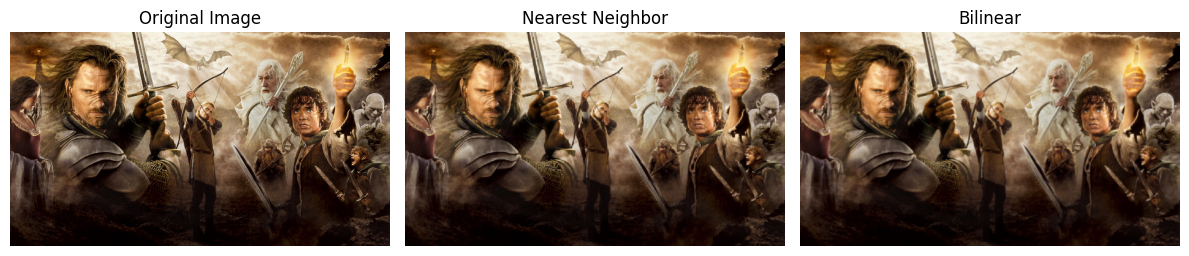

In [22]:
# Convert BGR → RGB for matplotlib
original_rgb = cv.cvtColor(original, cv.COLOR_BGR2RGB)
zoomed_nn_rgb = cv.cvtColor(zoomed_nn, cv.COLOR_BGR2RGB)
zoomed_bi_rgb = cv.cvtColor(zoomed_bi, cv.COLOR_BGR2RGB)

# Plot in one row
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(original_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(zoomed_nn_rgb)
plt.title("Nearest Neighbor")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(zoomed_bi_rgb)
plt.title("Bilinear")
plt.axis("off")

plt.tight_layout()
plt.show()

#### Image 2:

In [23]:
# Load images
original = cv.imread('a1images/a1q5images/im02.png')
small = cv.imread('a1images/a1q5images/im02small.png')

zoomed_nn = zoom(small, 'nn', scale=4)
zoomed_bi = zoom(small, 'bilinear', scale=4)

ssd_nn = norm_SSD(original, zoomed_nn)
ssd_bi = norm_SSD(original, zoomed_bi)

print("Normalized SSD - Nearest Neighbor:", ssd_nn)
print("Normalized SSD - Bilinear:", ssd_bi)


Normalized SSD - Nearest Neighbor: 64.62936
Normalized SSD - Bilinear: 48.96062


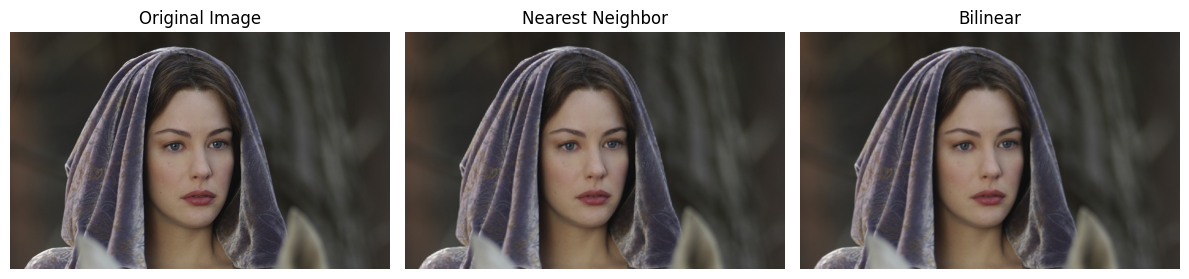

In [24]:
# Convert BGR → RGB for matplotlib
original_rgb = cv.cvtColor(original, cv.COLOR_BGR2RGB)
zoomed_nn_rgb = cv.cvtColor(zoomed_nn, cv.COLOR_BGR2RGB)
zoomed_bi_rgb = cv.cvtColor(zoomed_bi, cv.COLOR_BGR2RGB)

# Plot in one row
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(original_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(zoomed_nn_rgb)
plt.title("Nearest Neighbor")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(zoomed_bi_rgb)
plt.title("Bilinear")
plt.axis("off")

plt.tight_layout()
plt.show()

#### Image 3:

In [30]:
# Load images
original = cv.imread('a1images/a1q5images/im03.png')
small = cv.imread('a1images/a1q5images/im03small.png')

zoomed_nn = zoom(small, 'nn', scale=4)
zoomed_bi = zoom(small, 'bilinear', scale=4)

# Force exact match with original dimensions
zoomed_nn = cv.resize(zoomed_nn, (original.shape[1], original.shape[0]), interpolation=cv.INTER_NEAREST)
zoomed_bi = cv.resize(zoomed_bi, (original.shape[1], original.shape[0]), interpolation=cv.INTER_LINEAR)


ssd_nn = norm_SSD(original, zoomed_nn)
ssd_bi = norm_SSD(original, zoomed_bi)

print("Normalized SSD - Nearest Neighbor:", ssd_nn)
print("Normalized SSD - Bilinear:", ssd_bi)

Normalized SSD - Nearest Neighbor: 129.71419
Normalized SSD - Bilinear: 113.61149


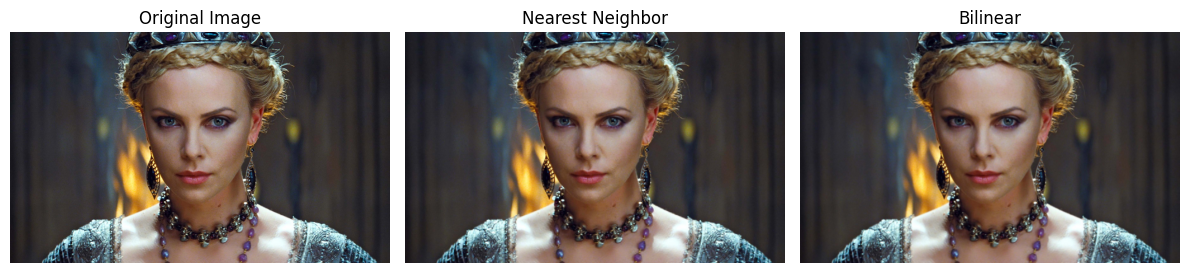

In [31]:
# Convert BGR → RGB for matplotlib
original_rgb = cv.cvtColor(original, cv.COLOR_BGR2RGB)
zoomed_nn_rgb = cv.cvtColor(zoomed_nn, cv.COLOR_BGR2RGB)
zoomed_bi_rgb = cv.cvtColor(zoomed_bi, cv.COLOR_BGR2RGB)

# Plot in one row
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(original_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(zoomed_nn_rgb)
plt.title("Nearest Neighbor")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(zoomed_bi_rgb)
plt.title("Bilinear")
plt.axis("off")

plt.tight_layout()
plt.show()

#### Image 4:

In [38]:
# Load images
original = cv.imread('a1images/a1q5images/taylor.jpg')
small = cv.imread('a1images/a1q5images/taylor_small.jpg')

zoomed_nn = zoom(small, 'nn', scale=4)
zoomed_bi = zoom(small, 'bilinear', scale=4)

# Force exact match with original dimensions
zoomed_nn = cv.resize(zoomed_nn, (original.shape[1], original.shape[0]), interpolation=cv.INTER_NEAREST)
zoomed_bi = cv.resize(zoomed_bi, (original.shape[1], original.shape[0]), interpolation=cv.INTER_LINEAR)


ssd_nn = norm_SSD(original, zoomed_nn)
ssd_bi = norm_SSD(original, zoomed_bi)

print("Normalized SSD - Nearest Neighbor:", ssd_nn)
print("Normalized SSD - Bilinear:", ssd_bi)

Normalized SSD - Nearest Neighbor: 292.48962
Normalized SSD - Bilinear: 278.12674


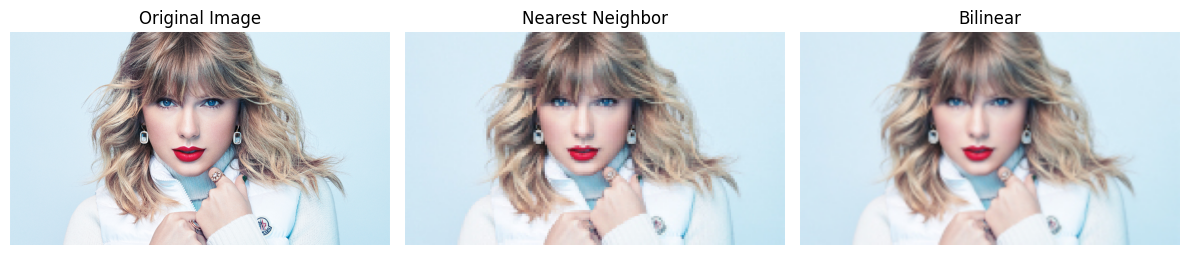

In [39]:
# Convert BGR → RGB for matplotlib
original_rgb = cv.cvtColor(original, cv.COLOR_BGR2RGB)
zoomed_nn_rgb = cv.cvtColor(zoomed_nn, cv.COLOR_BGR2RGB)
zoomed_bi_rgb = cv.cvtColor(zoomed_bi, cv.COLOR_BGR2RGB)

# Plot in one row
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(original_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(zoomed_nn_rgb)
plt.title("Nearest Neighbor")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(zoomed_bi_rgb)
plt.title("Bilinear")
plt.axis("off")

plt.tight_layout()
plt.show()